<a href="https://colab.research.google.com/github/jyryu3161/SyntheticBiology/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repressilator Simulation

In [1]:
!pip install biomass

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.9/174.9 kB 2.4 MB/s eta 0:00:00


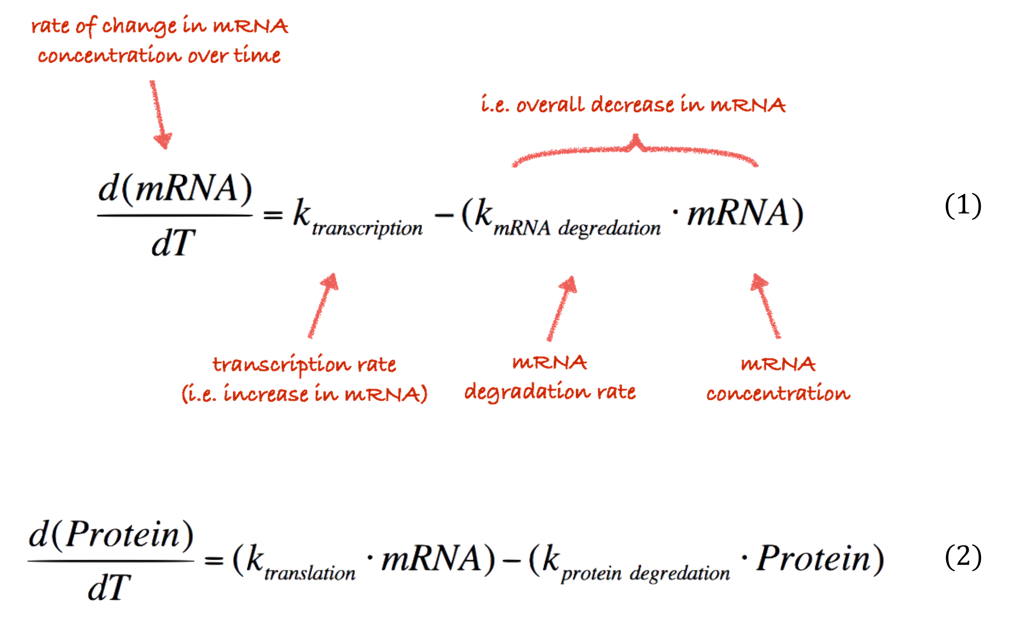

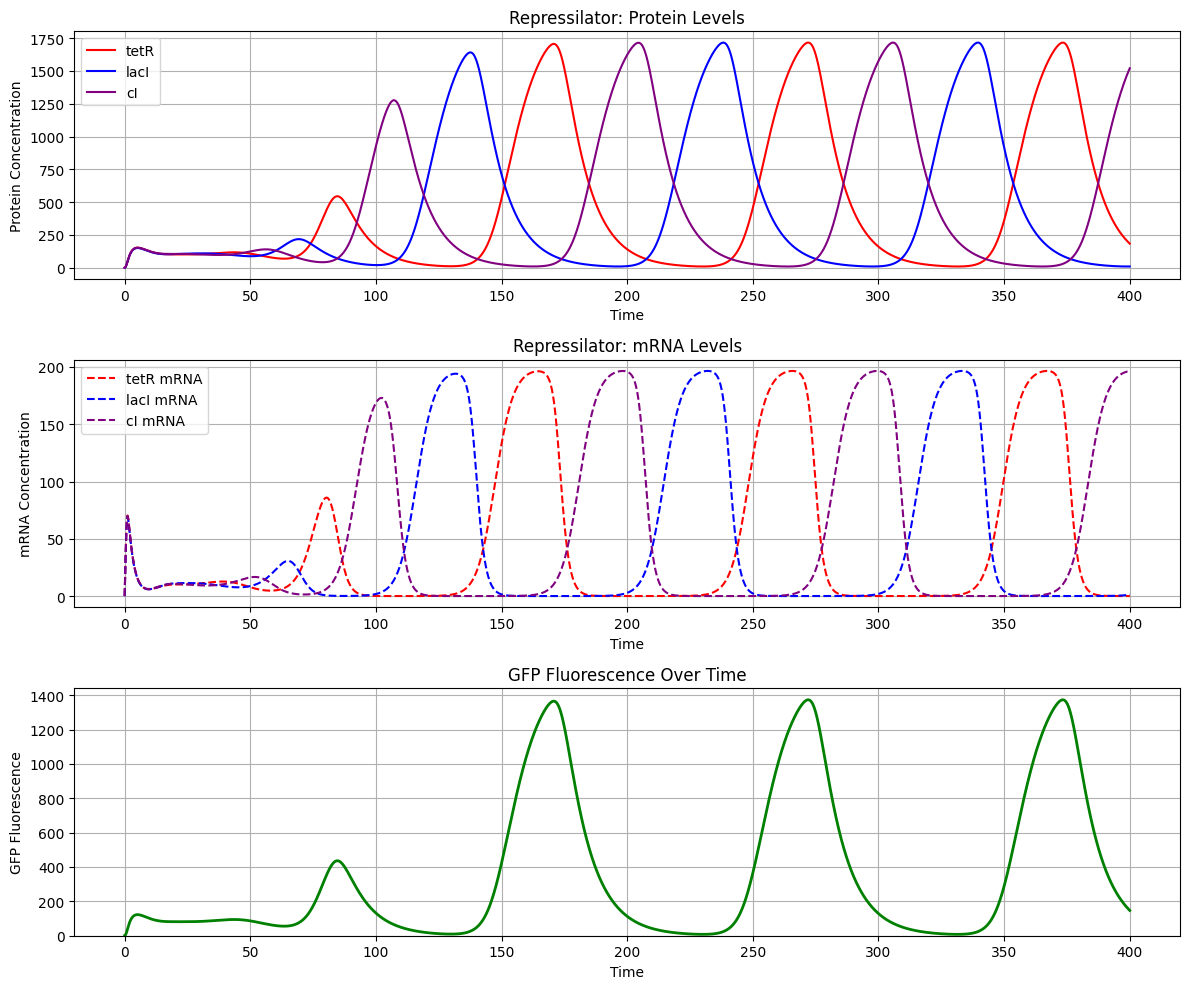

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters - adjusted for better oscillation
alpha = 100.0  # Maximum transcription rate
alpha0 = 0.03  # Leaky transcription
K = 40.0       # Repression coefficient (higher for stronger repression)
n = 3.0        # Hill coefficient (increased for stronger cooperativity)
gamma_m = 0.5  # mRNA degradation rate
gamma_p = 0.1  # Protein degradation rate

# Define the repressilator system ODEs
def repressilator(y, t):
    # Extract mRNA and protein concentrations from state vector
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = y

    # Rate of change of mRNA - adjusted to match the diagram
    # tetR represses lacI, lacI represses cI, cI represses tetR
    dm_tetR_dt = alpha/(1 + (p_cI/K)**n) + alpha0 - gamma_m * m_tetR
    dm_lacI_dt = alpha/(1 + (p_tetR/K)**n) + alpha0 - gamma_m * m_lacI
    dm_cI_dt = alpha/(1 + (p_lacI/K)**n) + alpha0 - gamma_m * m_cI

    # Rate of change of proteins
    dp_tetR_dt = m_tetR - gamma_p * p_tetR
    dp_lacI_dt = m_lacI - gamma_p * p_lacI
    dp_cI_dt = m_cI - gamma_p * p_cI

    return [dm_tetR_dt, dm_lacI_dt, dm_cI_dt, dp_tetR_dt, dp_lacI_dt, dp_cI_dt]

# Initial conditions - slightly unbalanced to trigger oscillation
y0 = [0.5, 0, 0, 0.5, 0, 0]  # [m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI]

# Time points - extended to see multiple oscillations
t = np.linspace(0, 400, 4000)

# Solve the ODE system
sol = odeint(repressilator, y0, t)

# Extract results
m_tetR = sol[:, 0]
m_lacI = sol[:, 1]
m_cI = sol[:, 2]
p_tetR = sol[:, 3]
p_lacI = sol[:, 4]
p_cI = sol[:, 5]

# Calculate GFP from tetR (in this design, GFP is under the same promoter as tetR)
# This matches the diagram where GFP appears to be co-expressed with tetR
gfp = p_tetR * 0.8  # GFP production proportional to tetR protein levels

# Create plots
plt.figure(figsize=(12, 10))

# Plot protein levels
plt.subplot(3, 1, 1)
plt.plot(t, p_tetR, 'r-', label='tetR')
plt.plot(t, p_lacI, 'b-', label='lacI')
plt.plot(t, p_cI, 'purple', label='cI')
plt.title('Repressilator: Protein Levels')
plt.xlabel('Time')
plt.ylabel('Protein Concentration')
plt.legend()
plt.grid(True)

# Plot mRNA levels
plt.subplot(3, 1, 2)
plt.plot(t, m_tetR, 'r--', label='tetR mRNA')
plt.plot(t, m_lacI, 'b--', label='lacI mRNA')
plt.plot(t, m_cI, 'purple', linestyle='--', label='cI mRNA')
plt.title('Repressilator: mRNA Levels')
plt.xlabel('Time')
plt.ylabel('mRNA Concentration')
plt.legend()
plt.grid(True)

# Plot GFP fluorescence (following tetR expression)
plt.subplot(3, 1, 3)
plt.plot(t, gfp, 'g-', linewidth=2)
plt.title('GFP Fluorescence Over Time')
plt.xlabel('Time')
plt.ylabel('GFP Fluorescence')
plt.grid(True)
plt.ylim(bottom=0)  # Ensure y-axis starts at 0

plt.tight_layout()
plt.savefig('repressilator_oscillations.png', dpi=300)
plt.show()


# Metabolic Simulation

In [ ]:
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 27.5 MB/s eta 0:00:00


In [ ]:
from cobra.io import load_model

model = load_model("iJO1366")
print(len(model.reactions))
print(len(model.metabolites))
print(len(model.genes))

2583
1805
1367


In [ ]:
model.optimize()


,fluxes,reduced_costs
DM_4crsol_c,0.000219,0.000000
DM_5drib_c,0.000221,0.000000
DM_aacald_c,0.000000,0.000000
DM_amob_c,0.000002,0.000000
DM_mththf_c,0.000440,0.000000
...,...,...
ZN2abcpp,0.000000,-0.008295
ZN2t3pp,0.000000,-0.002074
ZN2tpp,0.000335,0.000000
ZNabcpp,0.000000,-0.008295


https://sbrg.github.io/escher-fba/#/